# 1. Introduction 👋
In this project, we worked with a medical dataset to predict diabetes outcomes 
using various machine learning techniques. The dataset comprises features like 
glucose levels, blood pressure, BMI, and other health-related metrics that are 
critical for predicting whether a patient has diabetes.Data Exploration and 
PreprocessingThe project began with an initial exploration of the dataset to 
understand its structure and contents. We analyzed the first few rows to get a 
glimpse of the data distribution and checked for any missing values. 
Understanding the types of data and their distributions helped in making 
informed decisions about preprocessing.Next, we performed data preprocessing 
steps, including:Handling Missing Values: Ensured that the dataset had no 
missing values that could affect model performance.Feature Scaling: 
Normalized features like glucose levels and BMI to bring them onto a similar 
scale, ensuring better performance for machine learning models.Model 
TrainingWe trained multiple machine learning models to predict the outcome 
variable (diabetes or not). The primary models used were:Logistic Regression: A 
linear model that predicts binary outcomes and provides a probabilistic 
interpretation of the classification.K-Nearest Neighbors (KNN): A non-parametric 
algorithm that classifies data points based on the majority class among its 
nearest neighbors.Both models were trained on the dataset using cross
validation techniques to ensure they generalize well to unseen data.Model 
EvaluationAfter training, we evaluated the models using metrics such as 
accuracy and confusion matrices. These metrics allowed us to understand how 
well our models performed in correctly identifying diabetic and non-diabetic 
patients.Accuracy Score: Provided a straightforward measure of the overall 
correctness of the model's predictions.Confusion Matrix: Gave deeper insights 
into the model’s performance, specifically in terms of true positives, true 
negatives, false positives, and false negatives.Model Saving and 
DeploymentFinally, the trained models were saved using joblib, enabling easy 
reloading and deployment without needing to retrain them. This process ensures 
that the models can be used in real-world applications or further analysis 
without repeating the entire training process.ConclusionThe steps followed in 
this project—from data exploration to model deployment—provide a 
comprehensive approach to solving classification problems in healthcare. By 
using logistic regression and KNN, we were able to effectively predict diabetes 
outcomes, showcasing the power of machine learning in medical diagnostics.


# 2. Importing Libraries 📚
👉 **Importing libraries** that will be used in this notebook.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 3. Reading Data Set 👓
👉 After importing libraries, we will also **import the dataset** that will be used.

In [8]:
df_drug = pd.read_csv("cats_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'cats_dataset.csv'

👉 Read the first 6 rows in the dataset.

In [8]:
df_drug.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

👉 Data type and checking null in dataset.

In [9]:
print(df_drug.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [10]:
df_drug.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

👉 From the results above, **there are no missing/null value** in this dataset

# 4. Initial Dataset Exploration 🔍
👉 This section will explore raw dataset that has been imported.

## 4.1 Categorical Variables 📊

In [11]:
df_drug.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

👉 It can be seen that from results above, DrugY has more amount than other types of drugs

👉 The distribution of patient gender is balanced.

👉 The distribution of blood pressure level is balanced.

👉 The distribution of cholesterol level is balanced.

## 4.2 Numerical Variables 🔢
👉 This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.

In [12]:
df_drug.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [13]:
# 1. Handle Missing Values
# For categorical columns, fill with mode
#for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
   # mode_val = df_drug[column].mode()[0]
    #df_drug[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']:
    median_val = df_drug[column].median()
    df_drug[column].fillna(median_val, inplace=True)

check double values

In [14]:
df_drug.duplicated().sum()

0

In [15]:
df_drug.drop_duplicates(inplace=True)


C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


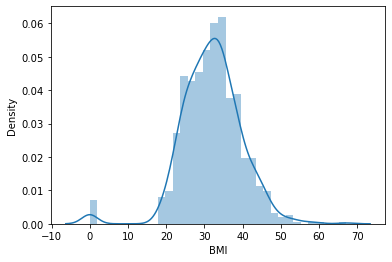

In [16]:
sns.distplot(df_drug['BMI']);

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


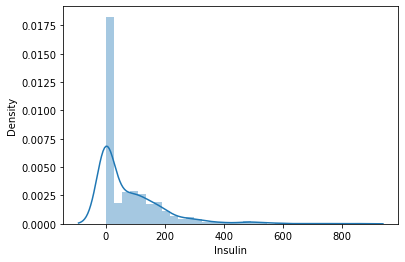

In [17]:
sns.distplot(df_drug['Insulin']);

👉The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
👉The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

C:\Users\O2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


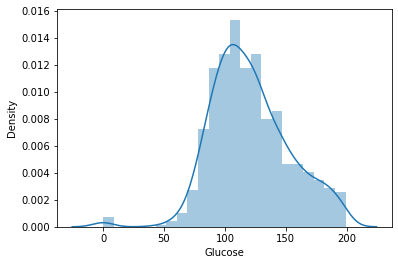

In [28]:
sns.distplot(df_drug['Glucose']);

# 5. EDA 📊
👉 This section will explore variables in the dataset using different various plots/charts.

## 5.1 Drug Type Distribution 💊

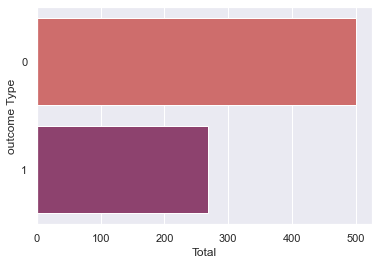

In [38]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Outcome", data=df_drug, palette="flare")
plt.ylabel('outcome Type')
plt.xlabel('Total')
plt.show()

## 5.2 Gender Distribution 👫

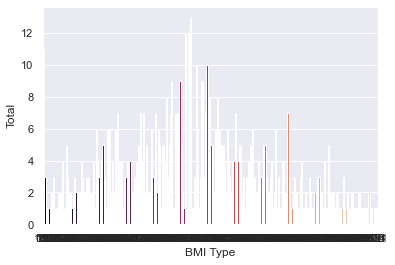

In [22]:
sns.set_theme(style="darkgrid")
sns.countplot(x="BMI", data=df_drug, palette="rocket")
plt.xlabel('BMI Type')
plt.ylabel('Total')
plt.show()

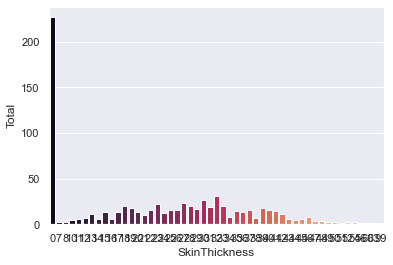

In [23]:
sns.set_theme(style="darkgrid")
sns.countplot(x="SkinThickness", data=df_drug, palette="rocket")
plt.xlabel('SkinThickness')
plt.ylabel('Total')
plt.show()

## 5.3 Blood Pressure Distribution 🩸

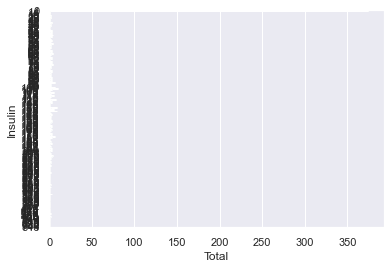

In [25]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Insulin", data=df_drug, palette="crest")
plt.ylabel('Insulin')
plt.xlabel('Total')
plt.show()

## 5.4 Cholesterol Distribution 🥛

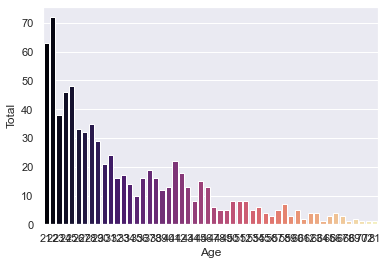

In [24]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Age", data=df_drug, palette="magma")
plt.xlabel('Age')
plt.ylabel('Total')
plt.show()

## 5.5 Gender Distribution based on Drug Type 👫💊

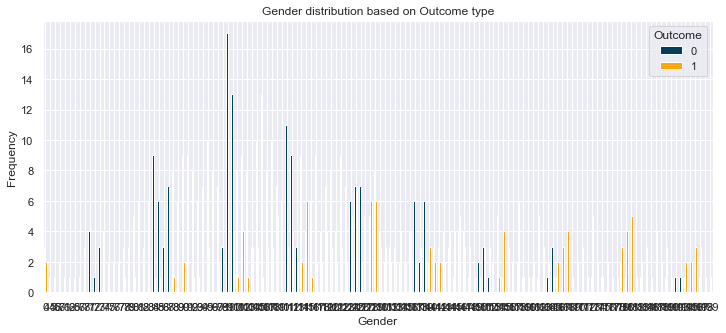

In [26]:
pd.crosstab(df_drug.Glucose,df_drug.Outcome).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Outcome type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

## 5.6 Blood Pressure Distribution based on Cholesetrol 🩸🥛

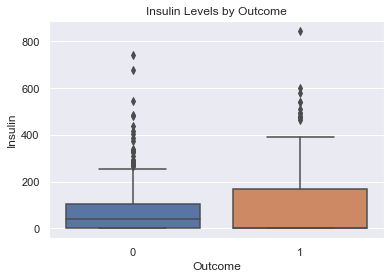

In [28]:
sns.boxplot(x='Outcome', y='Insulin',data=df_drug)
plt.title('Insulin Levels by Outcome')
plt.show()

## 5.7 Sodium to Potassium Distribution based on Gender and Age 🧪👫👴

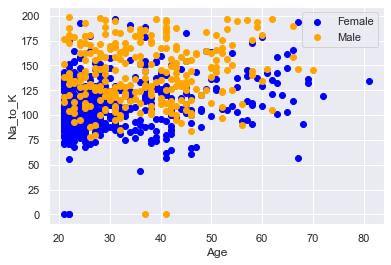

In [45]:
plt.scatter(x=df_drug.Age[df_drug.Outcome==0], y=df_drug.Glucose[(df_drug.Outcome==0)], c="Blue")
plt.scatter(x=df_drug.Age[df_drug.Outcome==1], y=df_drug.Glucose[(df_drug.Outcome==1)], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

In [46]:
df_drug.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# 6. Dataset Preparation ⚙
👉 This section will prepare the dataset before building the machine learning models.

## 6.1 Data Binning 🚮

### 6.1.1 Age 👴
👉 The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [47]:
bin_age = [0, 40, 80, 120, 160, 200]
category_age = ['<40', '40-80', '80-120', '120-160', '>160']
df_drug['Age_binned'] = pd.cut(df_drug['Glucose'], bins=bin_age, labels=category_age)
df_drug = df_drug.drop(['Glucose'], axis = 1)

### 6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [29]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df_drug['BMI_binned'] = pd.cut(df_drug['BMI'], bins=bin_NatoK, labels=category_NatoK)
df_drug = df_drug.drop(['BMI'], axis = 1)

In [49]:
df_drug.Age_binned.value_counts()

80-120     372
120-160    248
>160       101
40-80       42
<40          0
Name: Age_binned, dtype: int64

## 6.2 Splitting the dataset 🪓
👉 The dataset will be split into **70% training and 30% testing**.

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
X = df_drug.drop(["Outcome"], axis=1)
y = df_drug["Outcome"]
#تقسيم البيانات الى مجموعات تدريب واختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## 6.3 Feature Engineering 🔧
👉 The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [31]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [32]:
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
60             2       84              0              0        0   
618            9      112             82             24        0   
346            1      139             46             19       83   
294            0      161             50              0        0   
231            6      134             80             37      370   

     DiabetesPedigreeFunction  Age  BMI_binned_<10  BMI_binned_10-20  \
60                      0.304   21               0                 0   
618                     1.282   50               0                 0   
346                     0.654   22               0                 0   
294                     0.254   65               0                 0   
231                     0.238   46               0                 0   

     BMI_binned_20-30  BMI_binned_>30  
60                  0               0  
618                 1               0  
346                 1               0  
294                 1               0  
231                 0               1

In [33]:
X_test.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
668            6       98             58             33      190   
324            2      112             75             32        0   
624            2      108             64              0        0   
690            8      107             80              0        0   
473            7      136             90              0        0   

     DiabetesPedigreeFunction  Age  BMI_binned_<10  BMI_binned_10-20  \
668                     0.430   43               0                 0   
324                     0.148   21               0                 0   
624                     0.158   21               0                 0   
690                     0.856   34               0                 0   
473                     0.210   50               0                 0   

     BMI_binned_20-30  BMI_binned_>30  
668                 0               1  
324                 0               1  
624                 0               1  
690                 1               0  
473                 0               1

## save cleaned data

In [34]:
df_drug.to_csv("Clean_data.csv",index=False)

In [35]:
df_drug = pd.read_csv('Clean_data.csv')


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin  DiabetesPedigreeFunction       Age  \
Pregnancies              -0.073535                 -0.033523  0.544341   
Glucose                   0.331357                  0.137337  0.263514   
BloodPressure             0.088933              

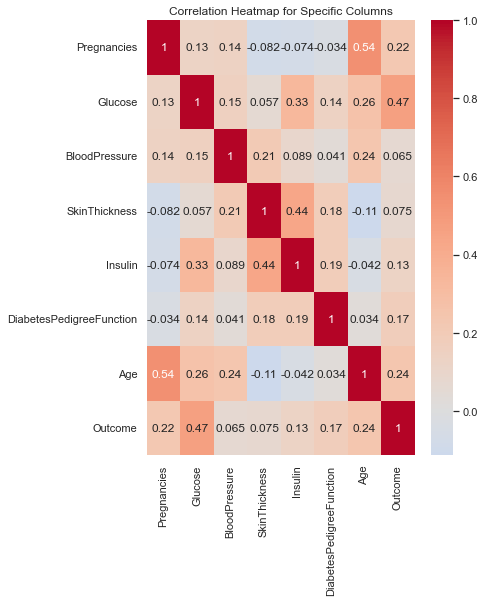

In [36]:
# Calculate correlation matrix for the specific columns
corr_matrix = df_drug.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(6, 8))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


# 7. Models 🛠

## 7.1 Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 77.92%


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[82 17]
 [17 38]]


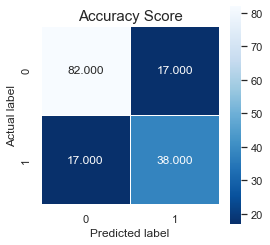

In [40]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

## save model

In [45]:
import joblib
model_filename = 'logistic_regression_model.joblib'
joblib.dump(LRclassifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as logistic_regression_model.joblib


## load and test model

In [46]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)
test = model_data.predict(X_test)
test


array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## 7.2 K Neighbours

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

[[87 12]
 [30 25]]
K Neighbours accuracy is: 72.73%


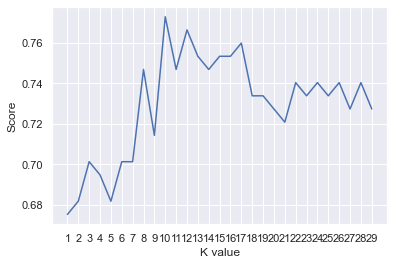

KNN Acc Max 77.27%


In [48]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

## 7.3 Support Vector Machine (SVM)

In [49]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=50)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

[[28 71]
 [31 24]]
SVC accuracy is: 33.77%


C:\Users\O2\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## 7.5 Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=5)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

[[85 14]
 [25 30]]
Decision Tree accuracy is: 74.68%


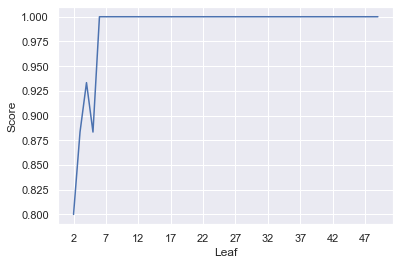

DT Acc Max 100.00%


In [94]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

## 7.6 Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=5)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

[[89 10]
 [25 30]]
Random Forest accuracy is: 77.27%


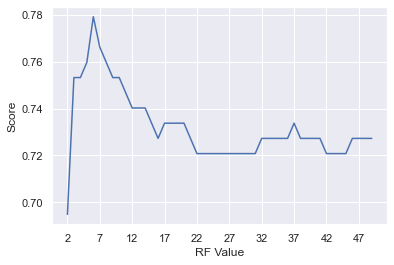

RF Acc Max 77.92%


In [53]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# 8. Model Comparison 👀

In [54]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM','Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

NameError: name 'DTAccMax' is not defined

👉 From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

# 10. References 🔗
📚 **Kaggle Notebook**:
*  [Drug Classification With Different Algorithms by Görkem Günay](https://www.kaggle.com/gorkemgunay/drug-classification-with-different-algorithms)
*  [Drug Classification - 100% Accuracy by Erin Ward](https://www.kaggle.com/eward96/drug-classification-100-accuracy)
*  [drug prediction with acc(100 %) by Sachin Sharma](https://www.kaggle.com/sachinsharma1123/drug-prediction-with-acc-100)